In [15]:
%matplotlib inline
import pandas as pd, datetime as dt
import collections
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import glob, os

In [16]:
TA = 112  # g/km, the type-approval for this vehicle

## PN vs CO2

In [17]:
files = glob.glob('*C.xls')                                     # read lab files (-7C) 

dic = {}                                                            # empty dictionary lab test

i = 1
for each in files:
  
    %time df = pd.read_excel(each, sheetname=1, header=0)                          # read the proper sheets within each file

    v = df['DACtrl_ActualSpeed\n[kph]']                                # speed 
    t_s = len(df.index)                                                # time(s)
    t_m = t_s/60                                                       # time (min)
    t_h = t_s/3600                                                     # time (h)
    v_mean = v.mean()                                                  # speed means
    d = v_mean * t_h                                                   # distance means

    CO2 = df['c_CO2_Dil_g_vec\n[grams]']
    CO2_sum = CO2.sum()
    CO2km = CO2_sum/d                                                    # CO2 per km 
    #CO2pct = CO2km*100/CO2_TA                                            # emissions as % of type approval (98 g/km)

    flow_gas = df['c_Vmix_vec\n[m3/min]']                               # flow of gas mixture [m3/min]
    flow_avg = flow_gas.sum()/t_s                                       # average in m3/min
    vol_gas = flow_avg * t_m                                            # total volume of gas mixture (m3)
    vol_gas_cc = vol_gas * 1e6                                          # total volume of gas mixture (cm3)

    PN = df["Counter\n[cpcc]"]                                         # column of PN flow in #/cm3
    PN_sum = PN.sum()                                                  
    PN_avg = PN_sum / t_s                                               # average of flow in #/cm3
    
    PN_total = PN_avg * vol_gas_cc                                      # total emitted in #
    PN_total_km = PN_total / d                                          # total emission in #/km
    
    key = each.split('dal_')[1].split('.x')[0]                             # shortening the titles of the files
    
    key = str(i) + "." + str(key)                                        # numbering the files
    dic[key] = [CO2km, vol_gas_cc, t_s, t_m, d, PN_sum, PN_avg, PN_total_km] # save means in the dictionary 
    i = i+1

Wall time: 611 ms
Wall time: 445 ms
Wall time: 433 ms
Wall time: 434 ms
Wall time: 459 ms
Wall time: 429 ms
Wall time: 495 ms
Wall time: 469 ms
Wall time: 437 ms
Wall time: 480 ms
Wall time: 765 ms
Wall time: 725 ms
Wall time: 739 ms


In [20]:
lab = pd.DataFrame()                                                          
lab = lab.from_dict(dic, orient='index')                                       # convert dic to dataframe
lab['ind2'] = ['1','5','6','3','3','4','4','6','5','2','7','7','8']
               
lab.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','ind2']               # headers
lab = lab.sort_values('ind2')

In [21]:
lab['test'] = ['N_CD_23','N+10%_CD_23','N_CD_30','N_CD_30','N_CD_10','N_CD_10','N_HT_23',
               'N_HT_23','N_HT_AC18+L_23','N_HT_AC18+L_23','W_CD_23','W_CD_23','W_HT_23']

lab.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','ind2','test']
lab

,CO2km,vol_gas_cc,t_s,t_m,d,PN_sum,PN_avg,PN_total_km,ind2,test
1.NEDC_COLD_FWD-sync_23°C,117.166484,2.265434e+08,1181,19.683333,10.977814,2.037631e+06,1725.344123,3.560503e+10,1,N_CD_23
10.NEDC+10% di Velocita'_COLD_FWD-sync_23°C,125.786075,2.280606e+08,1181,19.683333,11.945110,3.270363e+05,276.914749,5.286961e+09,2,N+10%_CD_23
4.NEDC_COLD_FWD-sync_30°C,117.265075,2.287550e+08,1181,19.683333,11.025267,1.772079e+05,150.048992,3.113254e+09,3,N_CD_30
5.NEDC_COLD_FWD-sync_30°C,116.922541,2.285945e+08,1181,19.683333,11.027169,4.612244e+05,390.537209,8.095882e+09,3,N_CD_30
6.NEDC_COLD_FWD-sync_10°C,124.839999,2.284953e+08,1181,19.683333,10.976285,3.289411e+05,278.527567,5.798157e+09,4,N_CD_10
7.NEDC_COLD_FWD-sync_10°C,125.405196,2.279774e+08,1181,19.683333,10.967750,3.536154e+05,299.420333,6.223799e+09,4,N_CD_10
2.NEDC_HOT_FWD-sync_23°C,111.918038,2.264083e+08,1181,19.683333,10.989402,7.709076e+05,652.758376,1.344840e+10,5,N_HT_23
9.NEDC_HOT_FWD-sync_23°C,111.500642,2.286544e+08,1181,19.683333,10.964584,5.264566e+05,445.771865,9.296083e+09,5,N_HT_23
3.NEDC_AC al max-4 Tacche+Luci Abb.Acc_HOT_FWD-sync_23°C,161.460166,2.269396e+08,1181,19.683333,10.967061,3.739665e+05,316.652452,6.552438e+09,6,N_HT_AC18+L_23
8.NEDC_AC al max-4 Tacche+Luci Abb.Acc_HOT_FWD-sync_23°C,158.207837,1.741577e+08,1181,19.683333,10.939130,1.824993e+05,154.529456,2.460205e+09,6,N_HT_AC18+L_23


In [22]:
name = lab.groupby(lab.ind2).mean()#.reset_index()#drop = True)
name['test'] = ['N_CD_23','N+10%_CD_23',
               'N_CD_30','N_CD_10','N_HT_23',
               'N_HT_AC18+L_23','W_CD_23','W_HT_23']
name.columns = ['CO2km', 'vol_gas_cc', 't_s', 't_m', 'd', 'PN_sum', 'PN_avg', 'PN_total_km','test']

name

,CO2km,vol_gas_cc,t_s,t_m,d,PN_sum,PN_avg,PN_total_km,test
ind2,,,,,,,,,
1,117.166484,2.265434e+08,1181,19.683333,10.977814,2.037631e+06,1725.344123,3.560503e+10,N_CD_23
2,125.786075,2.280606e+08,1181,19.683333,11.945110,3.270363e+05,276.914749,5.286961e+09,N+10%_CD_23
3,117.093808,2.286748e+08,1181,19.683333,11.026218,3.192162e+05,270.293100,5.604568e+09,N_CD_30
4,125.122597,2.282363e+08,1181,19.683333,10.972017,3.412782e+05,288.973950,6.010978e+09,N_CD_10
5,111.709340,2.275313e+08,1181,19.683333,10.976993,6.486821e+05,549.265120,1.137224e+10,N_HT_23
6,159.834002,2.005487e+08,1181,19.683333,10.953096,2.782329e+05,235.590954,4.506321e+09,N_HT_AC18+L_23
7,141.472642,3.484564e+08,1801,30.016667,23.209201,8.327605e+05,462.387816,6.939192e+09,W_CD_23
8,137.300333,3.473506e+08,1800,30.000000,23.185837,9.659585e+05,536.643617,8.039542e+09,W_HT_23


## All tests

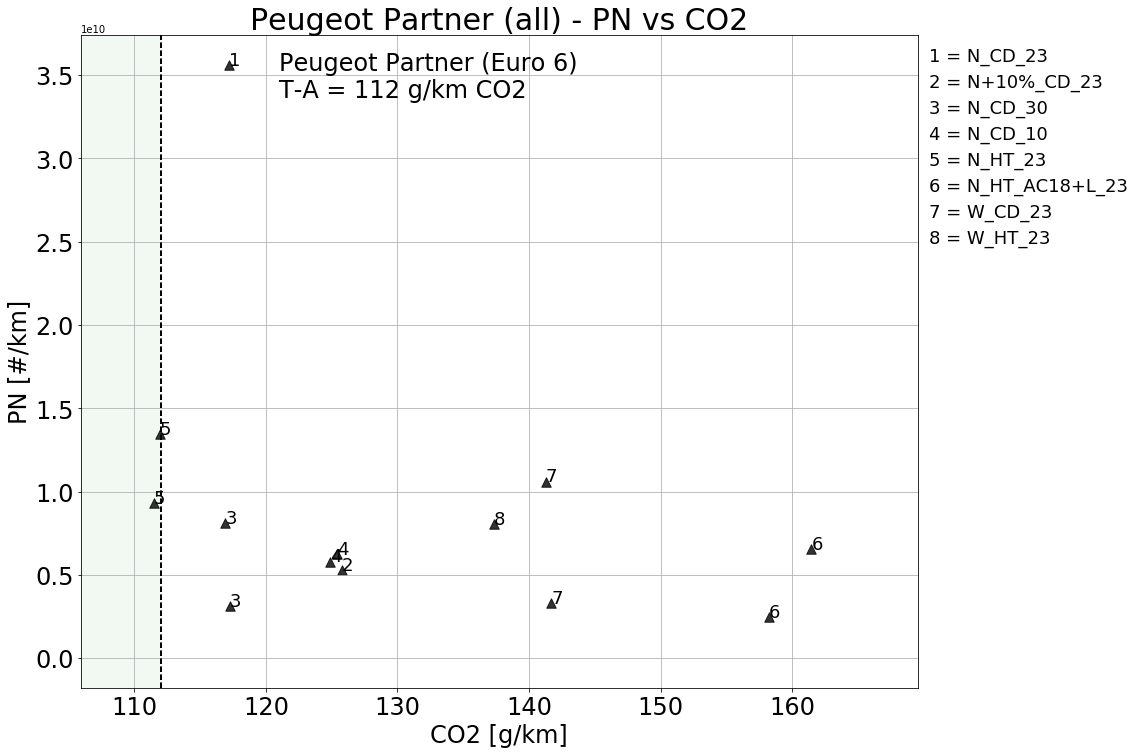

In [24]:
ax = lab.plot.scatter('CO2km', 'PN_total_km', marker="^", alpha=.8 ,s = 90, c = 'black', 
                      figsize=(15, 12), grid ='on')

# road.plot.scatter('CO2_COMP_','PN_COMP', ax=ax,  marker='*', s = 90, c = 'red', grid = 'on')
# road.plot.scatter('CO2_URB_','PN_URB', ax=ax, s = 60, alpha=.5, c = 'blue', grid = 'on')
# road.plot.scatter('CO2_RUR_','PN_RUR', ax=ax, s = 60, alpha=.5, c = 'green', grid = 'on')
# road.plot.scatter('CO2_MOT_','PN_MOT', ax=ax, s = 60, c = 'orange', grid = 'on')

# legend = ('LAB','ROAD (complete)','ROAD (urban)','ROAD (rural)','ROAD (motorway)')
# plt.legend(legend, fontsize = 16, loc = 'best')

# lim_inf_CO2 = min(lab.CO2km.min(),road.CO2_COMP_.min(), road.CO2_URB_.min(),
#                  road.CO2_RUR_.min(),road.CO2_MOT_.min()) -0.05*min(lab.CO2km.min(),
#                 road.CO2_COMP_.min(), road.CO2_URB_.min(), road.CO2_RUR_.min(),road.CO2_MOT_.min())
# lim_sup_CO2 = max(lab.CO2km.max(),road.CO2_COMP_.max(), road.CO2_URB_.max(),
#                  road.CO2_RUR_.max(),road.CO2_MOT_.max()) +0.05*max(lab.CO2km.max(),
#                 road.CO2_COMP_.max(), road.CO2_URB_.max(), road.CO2_RUR_.max(),road.CO2_MOT_.max())
# lim_inf_PN = min(lab.PN_total_km.min(),road.PN_COMP.min(), road.PN_URB.min(),
#                  road.PN_RUR.min(),road.PN_MOT.min()) -0.05*(max(lab.PN_total_km.min(),
#                 road.PN_COMP.min(), road.PN_URB.min(), road.PN_RUR.min(), road.PN_MOT.min()) -
#                 min(lab.PN_total_km.min(), road.PN_COMP.min(), road.PN_URB.min(), road.PN_RUR.min()
#                 , road.PN_MOT.min())                                                  )
# lim_sup_PN = max(lab.PN_total_km.max(),road.PN_COMP.max(), road.PN_URB.max(),
#                  road.PN_RUR.max(),road.PN_MOT.max()) +0.05*max(lab.PN_total_km.max(),
#                 road.PN_COMP.max(), road.PN_URB.max(), road.PN_RUR.max(),road.PN_MOT.max())

lim_inf_CO2 = lab.CO2km.min()-0.05*lab.CO2km.min()
lim_sup_CO2 = lab.CO2km.max()+0.05*lab.CO2km.max()
lim_inf_PN = -0.05*lab.PN_total_km.max()
lim_sup_PN = lab.PN_total_km.max()+0.05*lab.PN_total_km.max()

#lim_sup_PN = 1e12


fontsize = 24
plt.ylabel('PN [#/km]', fontsize = fontsize)
plt.xlabel('CO2 [g/km]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.title('Peugeot Partner (all) - PN vs CO2', fontsize = 30)
plt.axis([lim_inf_CO2,lim_sup_CO2,lim_inf_PN,lim_sup_PN])                             

if len(name)<10:
    for i, txt in enumerate(lab.ind2):
        ax.annotate(txt, (lab.CO2km.iat[i],lab.PN_total_km.iat[i]), ha = 'left', fontsize = 18, clip_on=True)
else:
    for i, txt in enumerate(lab.ind2):
        if i<[i for i,x in enumerate(lab.ind2) if x == '10'][0]:
            ax.annotate(txt.split('0')[1], (lab.CO2km.iat[i],lab.PN_total_km.iat[i]), ha = 'left', fontsize = 18)#, rotation = 30)
        else:
            ax.annotate(txt, (lab.CO2km.iat[i],lab.PN_total_km.iat[i]), ha = 'left', fontsize = 18, clip_on=True)#, rotation = 30)

# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_COMP_.iat[i],road.PN_COMP.iat[i]), 
#                 ha = 'left', fontsize = 14, clip_on=True)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_URB_.iat[i],road.PN_URB.iat[i]), 
#                 ha = 'left', fontsize = 14, clip_on=True)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_RUR_.iat[i],road.PN_RUR.iat[i]), 
#                 ha = 'left', fontsize = 14, clip_on=True)
# for i, txt in enumerate(road.ALPH):
#     ax.annotate(txt + '', (road.CO2_MOT_.iat[i],road.PN_MOT.iat[i]), 
#                 ha = 'left', fontsize = 14, clip_on=True)   
    
i=1
for each in name.test:
    plt.gcf().text(0.91, 0.88 - 0.03*i, str(i) + ' = ' +  each, fontsize=18)  # 
    i = i+1

# i = 0
# for each in road.index:
#     plt.gcf().text(0.91, 0.45 - 0.03*i, road.ALPH[i] + ' = ' + each.split('001_')[1].split('_2017')[0] , fontsize=18)
#     i = i+1

if TA>lim_inf_CO2:
    ax.annotate('Peugeot Partner (Euro 6) \nT-A = ' + str(TA) + ' g/km CO2',
                (TA+0.08*TA, lim_sup_PN-0.1*lim_sup_PN), textcoords='data', fontsize=24, clip_on=True)
else:
    ax.annotate('Peugeot Partner (Euro 6) \nT-A = ' + str(TA) + ' g/km CO2',
                (lim_inf_CO2+0.02*lim_inf_CO2, lim_sup_PN-0.1*lim_sup_PN), textcoords='data', fontsize=24, clip_on=True)
    
ax.annotate('PN conf. factor = 1.5',(lim_sup_CO2 - 0.31*(lim_sup_CO2-lim_inf_CO2), 6.1*1.5*1e11),
            textcoords='data', fontsize=24, clip_on=True)
ax.annotate('PN limit = 6x10^11 #/km',(lim_sup_CO2 - 0.39*(lim_sup_CO2-lim_inf_CO2), 6.15*1e11),
            textcoords='data', fontsize=24, clip_on=True)


plt.axvline(x=TA, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=6e11, color='k', linestyle='--', linewidth=2 )
plt.axhline(y=6e11*1.5, color='k', linestyle='--', linewidth=2 )

plt.axhspan(6e11, 6e11*1.5 , facecolor='yellow', alpha=0.1)
plt.axhspan(6e11*1.5, lim_sup_PN , facecolor='0.2', alpha=0.1)
plt.axvspan(lim_inf_CO2, TA, facecolor='green', alpha=0.05)